#### First import some libraries

In [31]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import axes as ax
from matplotlib import cm, style
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sys
%matplotlib notebook

Now read the file coordAa.dat.txt into 6 arrays

In [32]:
style.use('seaborn-dark')
x, y, z, vx, vy, vz = np.loadtxt('coordAa.dat.txt', unpack=True)

Now plot x vs. y and mark each point with a blue dot 'b.':

<IPython.core.display.Javascript object>


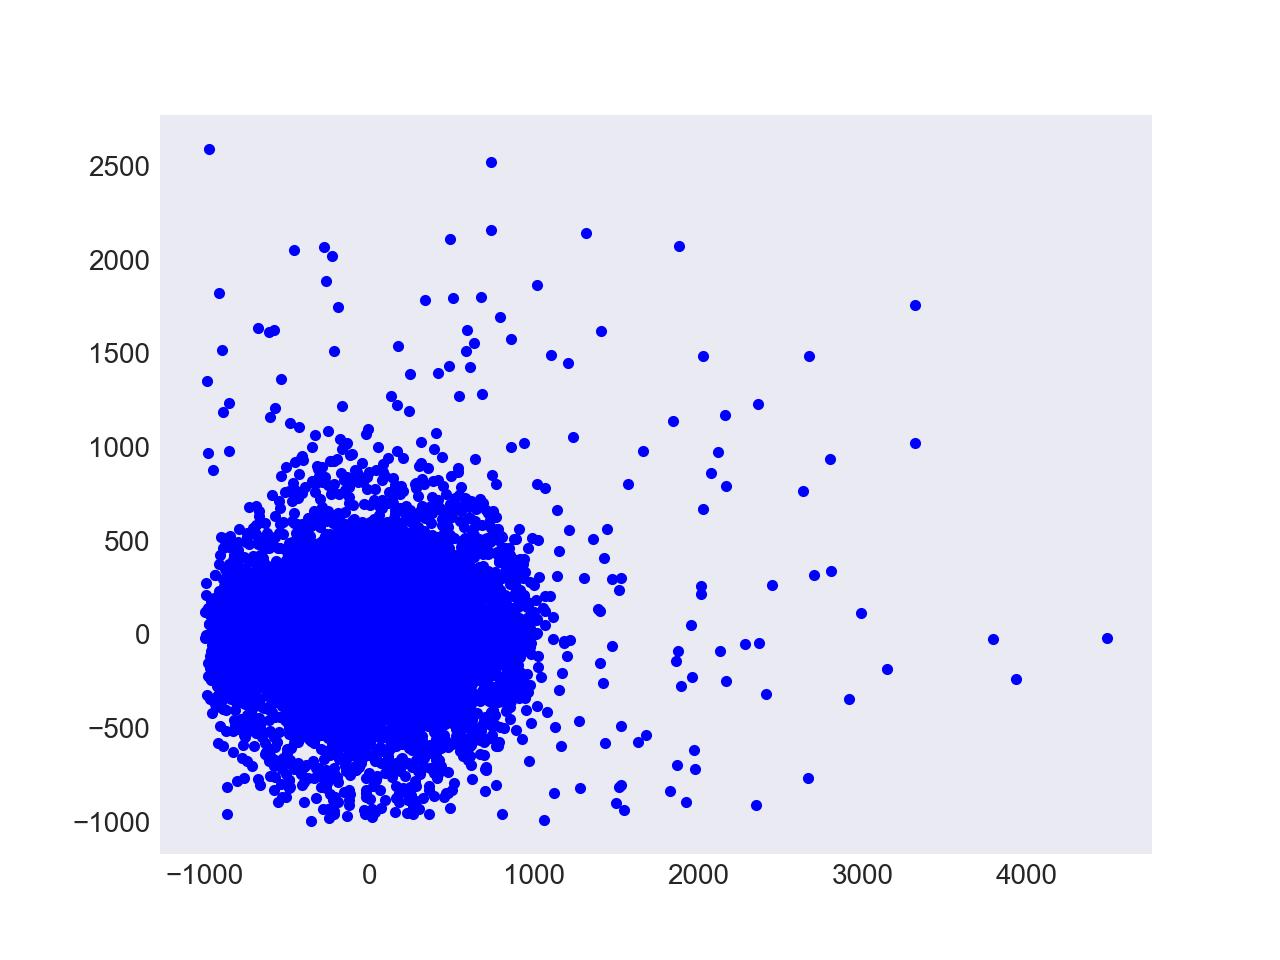

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, 'b.')
plt.show()

The points do not look centered around (0,0) so change the axes limits. Also let us add some axis labels:

<IPython.core.display.Javascript object>


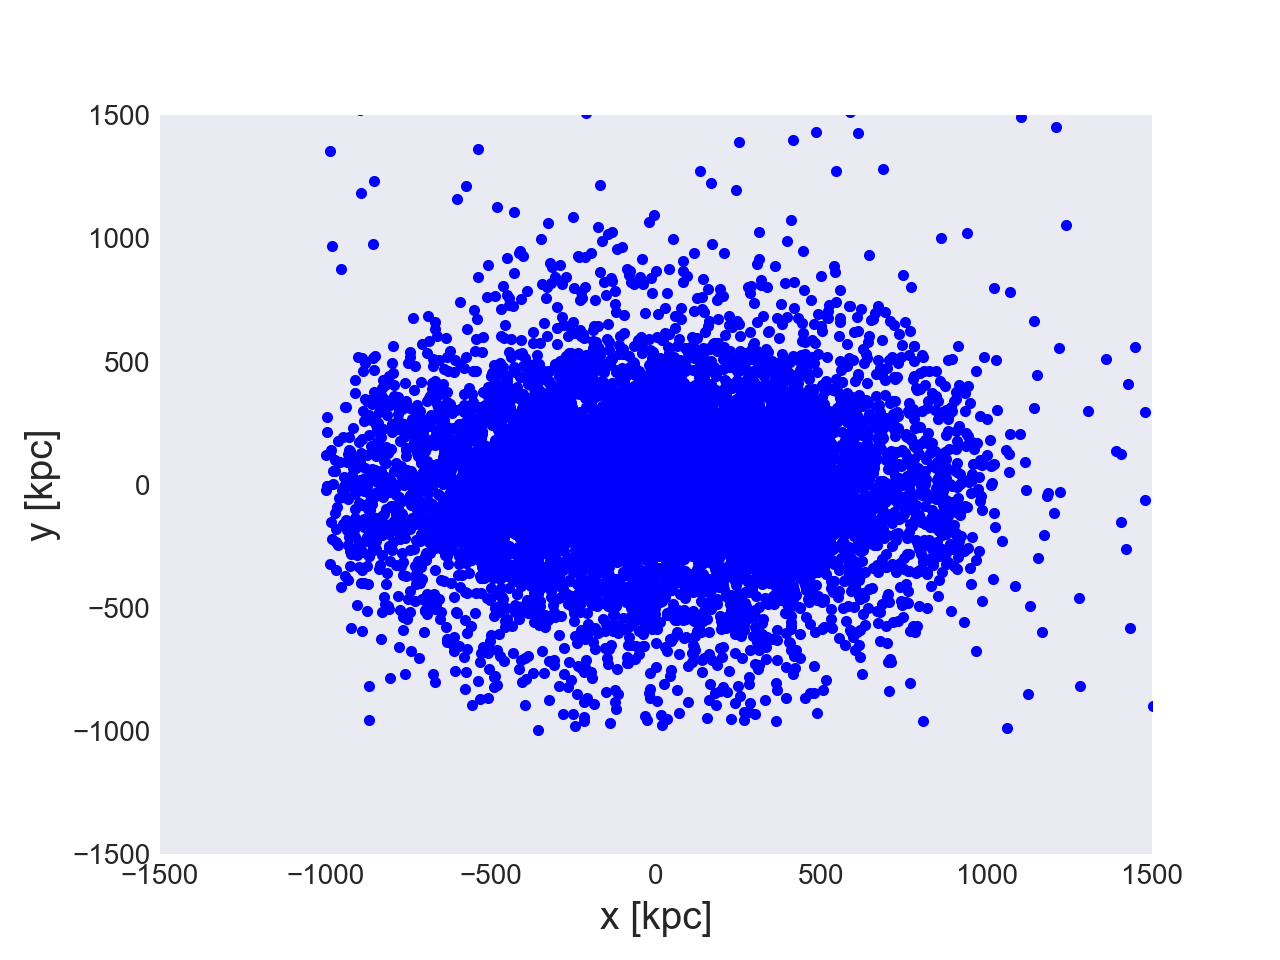

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('x [kpc]', size=14)
ax.set_ylabel('y [kpc]', size=14)
ax.set_xlim([-1500., 1500.])
ax.set_ylim([-1500., 1500.])
ax.plot(x, y, 'b.')
plt.show()

Now let's do the same thing with y vs. z:

<IPython.core.display.Javascript object>


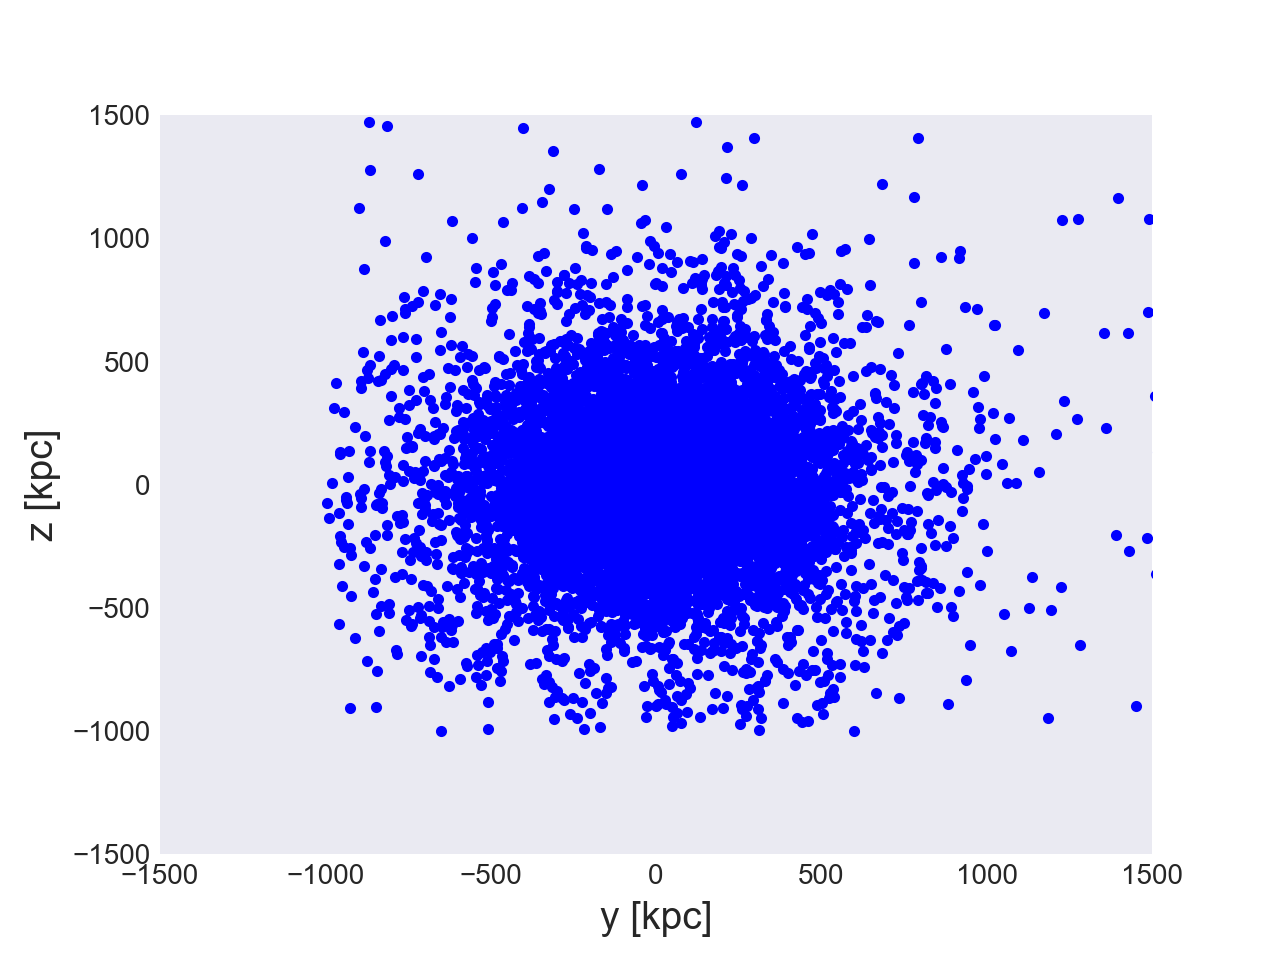

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('y [kpc]', size=14)
ax.set_ylabel('z [kpc]', size=14)
ax.set_xlim([-1500., 1500.])
ax.set_ylim([-1500., 1500.])
ax.plot(y, z, 'b.')
plt.show()

Now let's do the same thing with x vs. z:

<IPython.core.display.Javascript object>


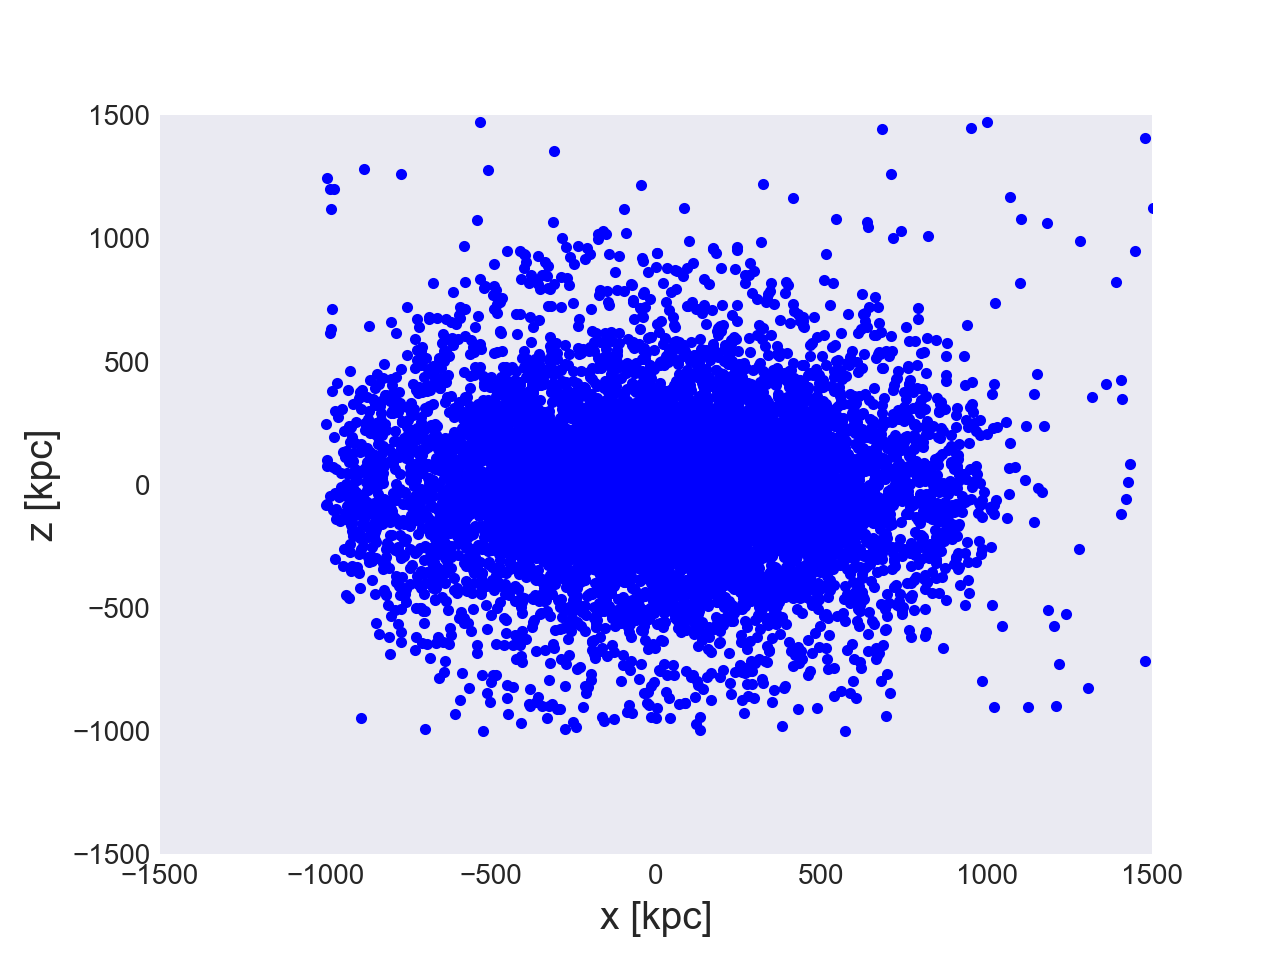

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('x [kpc]', size=14)
ax.set_ylabel('z [kpc]', size=14)
ax.set_xlim([-1500., 1500.])
ax.set_ylim([-1500., 1500.])
ax.plot(x, z, 'b.')
plt.show()

Now lets make a 3D scatter plot:

<IPython.core.display.Javascript object>


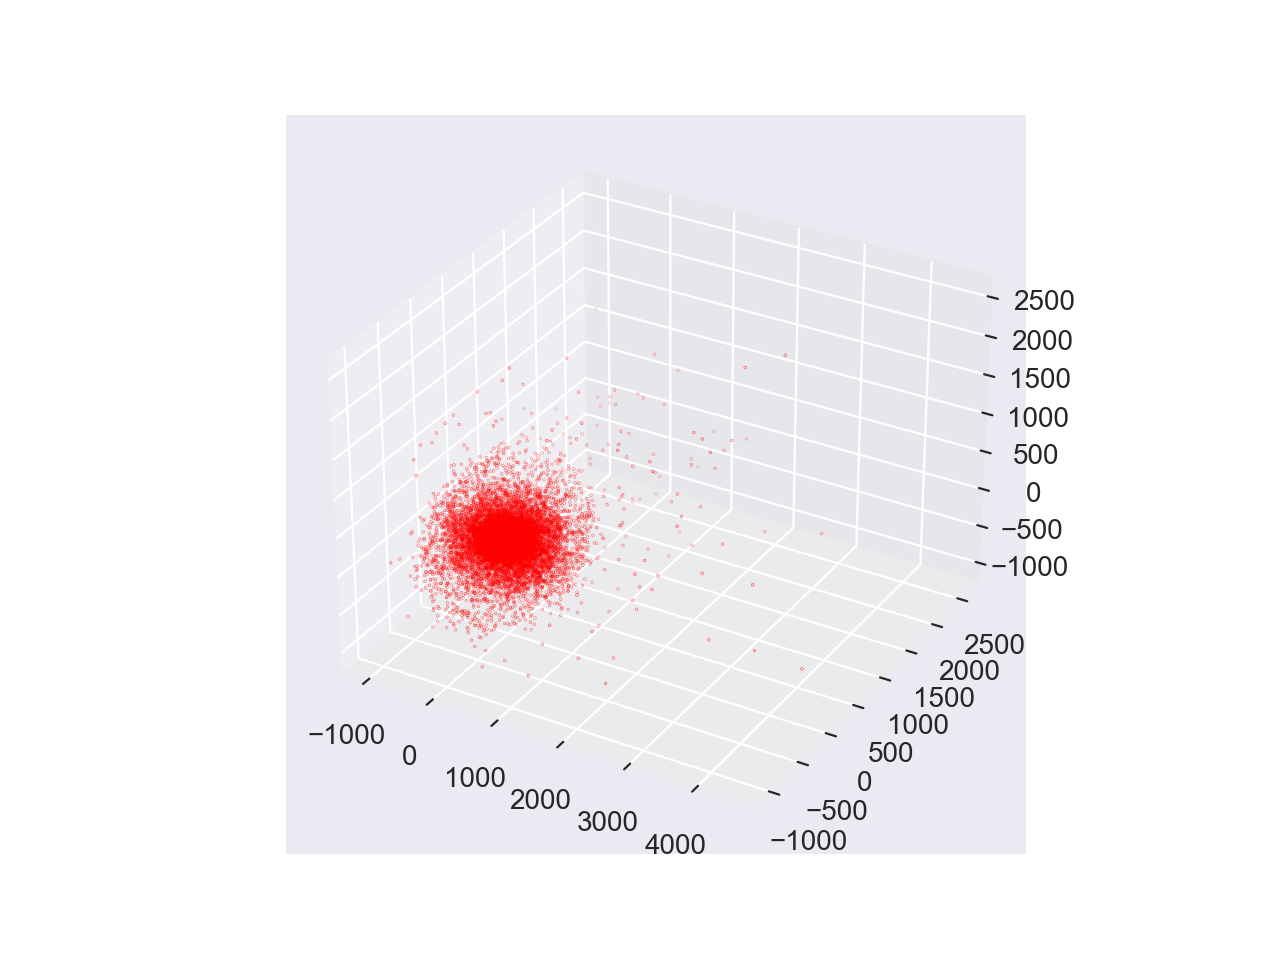

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='.', s=0.1)

Now let's center it and add labels on the axes to make it look pretty:

<IPython.core.display.Javascript object>


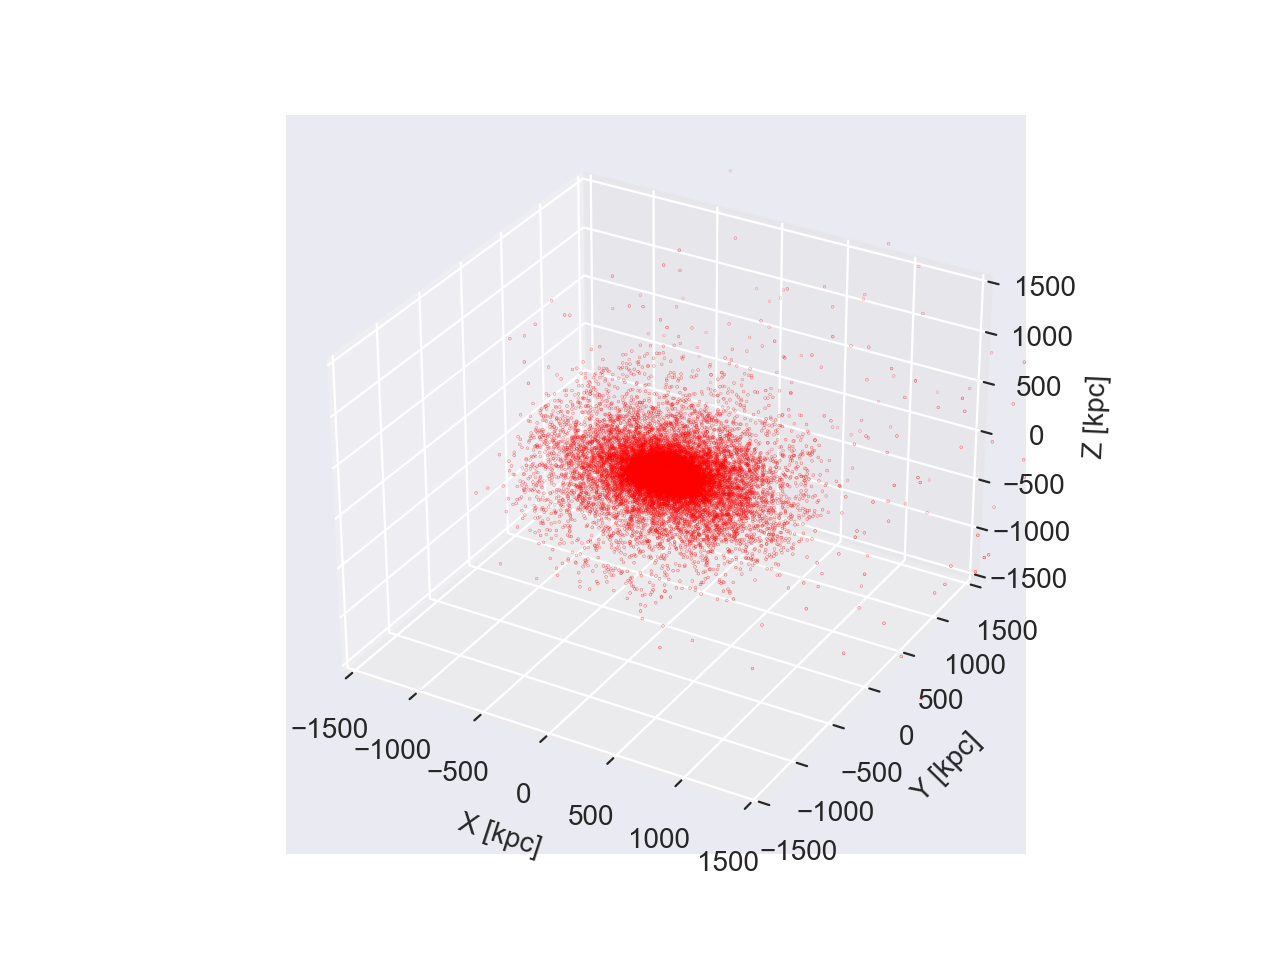

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='.', s=0.1)
#Axes3D.scatter(x,y,z)
ax.set_xlabel('X [kpc]')
ax.set_ylabel('Y [kpc]')
ax.set_zlabel('Z [kpc]')
#plt.axis([-1500., 1500., -1500., 1500, -1500, 1500])
ax.set_xlim3d(-1500, 1500)
ax.set_ylim3d(-1500, 1500)
ax.set_zlim3d(-1500, 1500)
plt.show()

In [39]:
unsorted_radius = [np.sqrt(i**2 + j**2 + k**2) for i, j, k in zip(x, y, z) if np.sqrt(i**2 + j**2 + k**2) <= 300]
radius = sorted(unsorted_radius)
max_radius = max(radius)
min_radius = min(radius)

print(max_radius, min_radius)

299.97082145558755 0.12655014816269478


Plot a histogram with 50 bins of radius vs frequency:

<IPython.core.display.Javascript object>


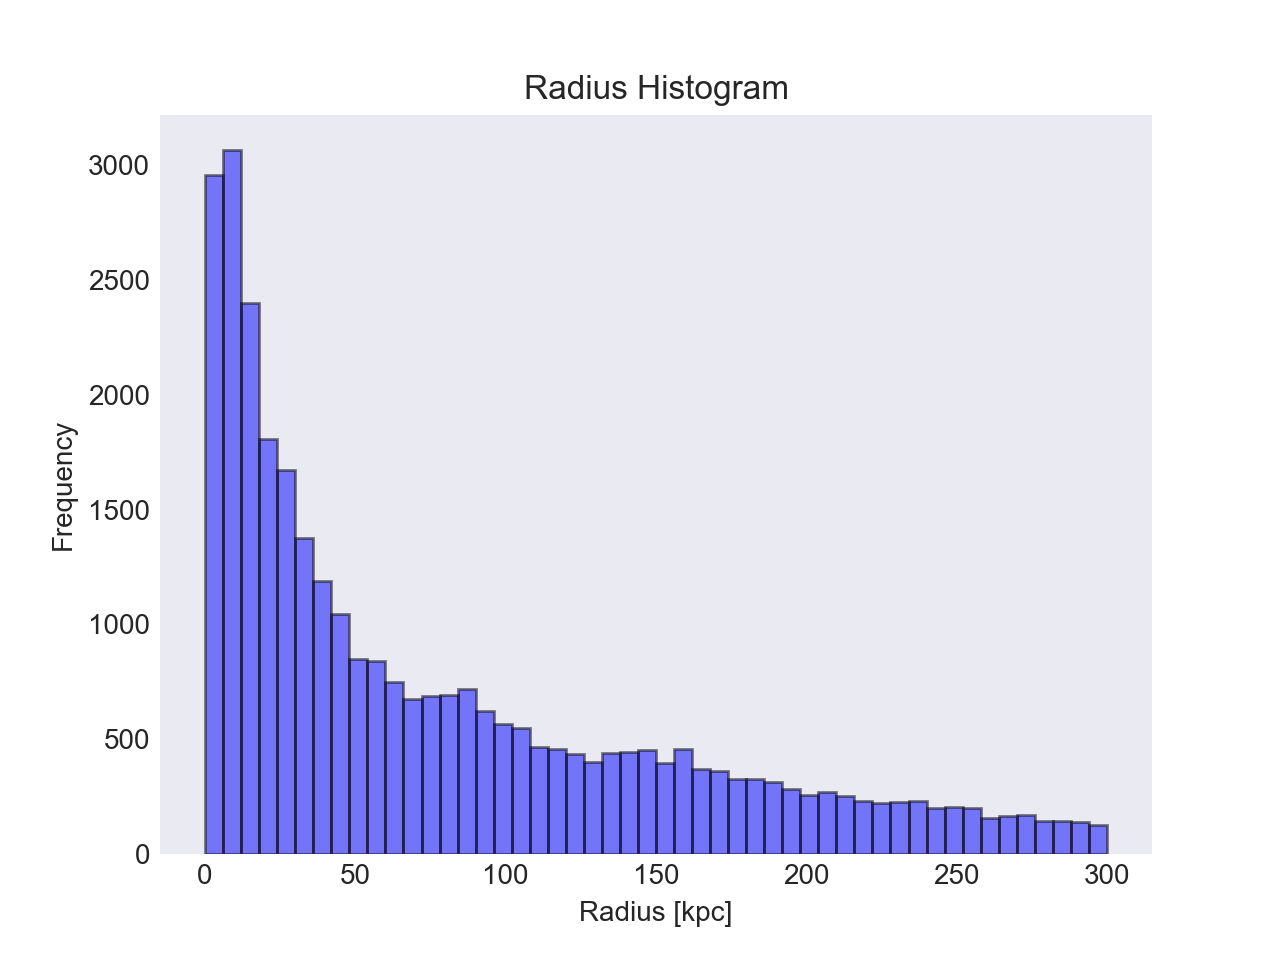

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

num_bins = 50
n1, bins, patches = ax.hist(radius, num_bins, facecolor="blue", alpha=0.5, ec="black")

ax.set_title("Radius Histogram")
ax.set_xlabel("Radius [kpc]")
ax.set_ylabel("Frequency")

plt.show()

Find median of each bin:

In [41]:
num_elements = 0
bin_content = []
median = []

for bin_size in n1:
	bin_content = radius[int(num_elements) : int(num_elements + bin_size)]

	if bin_size == 0:
		median.append(0)

	elif bin_size % 2 == 1:
		median.append(float(bin_content[int(((bin_size + 1) / 2) - 1)]))

	else:
		median.append((bin_content[int((bin_size / 2) - 1)] + bin_content[int(bin_size / 2)]) / 2.0)
	
	num_elements += bin_size

print(median)

[3.538890732983995, 8.987642760700414, 14.8753154470754, 20.93865626562507, 26.915400289832, 33.04077525558382, 38.89839550084296, 45.040854441939715, 51.16583765384868, 57.30748831460734, 63.16339091704941, 68.93410720232819, 75.22137051543265, 81.35919400741929, 86.95260930762157, 93.05392080304217, 98.80811663729858, 105.13781305961993, 111.10047026997681, 116.78422423645242, 122.89403981031789, 128.8995851968888, 135.20060544024943, 141.1196327885316, 147.00651496627623, 153.06063017258498, 158.97217501396275, 164.9571306892188, 171.10046343653892, 177.0133021241931, 182.80180604718777, 188.64543447708985, 195.04740454825338, 200.93070255376603, 207.13016796184598, 212.8660075637019, 219.0970208594357, 225.058248432578, 230.47775463124418, 236.91737917877617, 242.86773976559755, 248.77721626825073, 254.71648959061739, 260.8407401034857, 266.63793432287537, 272.6426479349054, 279.1306367916204, 285.27400172841305, 291.36719409408465, 296.91740284457194]


Volume of each slice is the difference of the radius of 2 spheres:

In [42]:
del_radius = float((max_radius) / (num_bins - 1))
volume_slices = [(4.0 / 3.0) * np.pi * ((((i + 1) * del_radius) ** 3) - ((i * del_radius) ** 3)) for i in range(num_bins)]
print(bins)
print(volume_slices)

[1.26550148e-01 6.12343557e+00 1.21203210e+01 1.81172064e+01
 2.41140919e+01 3.01109773e+01 3.61078627e+01 4.21047481e+01
 4.81016336e+01 5.40985190e+01 6.00954044e+01 6.60922898e+01
 7.20891753e+01 7.80860607e+01 8.40829461e+01 9.00798315e+01
 9.60767170e+01 1.02073602e+02 1.08070488e+02 1.14067373e+02
 1.20064259e+02 1.26061144e+02 1.32058030e+02 1.38054915e+02
 1.44051800e+02 1.50048686e+02 1.56045571e+02 1.62042457e+02
 1.68039342e+02 1.74036228e+02 1.80033113e+02 1.86029998e+02
 1.92026884e+02 1.98023769e+02 2.04020655e+02 2.10017540e+02
 2.16014425e+02 2.22011311e+02 2.28008196e+02 2.34005082e+02
 2.40001967e+02 2.45998853e+02 2.51995738e+02 2.57992623e+02
 2.63989509e+02 2.69986394e+02 2.75983280e+02 2.81980165e+02
 2.87977051e+02 2.93973936e+02 2.99970821e+02]
[961.0310209394632, 6727.217146576242, 18259.589397849795, 35558.14777476014, 58622.89227730726, 87453.8229054911, 122050.93965931184, 162414.2425387693, 208543.73154386354, 260439.40667459456, 318101.26793096244, 381529.

Density = mass / volume:

In [43]:
mass = 1.0
radial_mass_density = [(float(n) * mass / volume_slices[i]) for i, n in enumerate(n1)]
print(radial_mass_density)

[3.07690379974349, 0.45516592274093276, 0.13138302005205552, 0.050818170042103365, 0.028521281278495125, 0.01572258312236303, 0.009725447450985176, 0.0064341647854593296, 0.004071088561208696, 0.0032329976893705455, 0.002354596084673751, 0.0017770587286165423, 0.0015286532106052152, 0.0013201848289974604, 0.0011873143883327757, 0.0008976720715087553, 0.0007246908926163005, 0.0006204797904014228, 0.0004711347117449177, 0.0004185907573503183, 0.00036060267494889155, 0.00030233691595800985, 0.0003034649558498157, 0.0002794474147320312, 0.00026172612954547325, 0.00021226989069502542, 0.00022667871577442496, 0.00017105545540201735, 0.0001545665932679922, 0.00013071624554473457, 0.00012154031488434163, 0.00011010177303631756, 9.292376330938136e-05, 8.004224135021191e-05, 7.925773324400652e-05, 7.017720975296282e-05, 6.013681530515035e-05, 5.499939741034942e-05, 5.358348380921514e-05, 5.134946609158003e-05, 4.250160061940736e-05, 4.1686408258838574e-05, 3.8403732701707065e-05, 2.9326732782885

Plot a histogram of radius vs mass density:

<IPython.core.display.Javascript object>


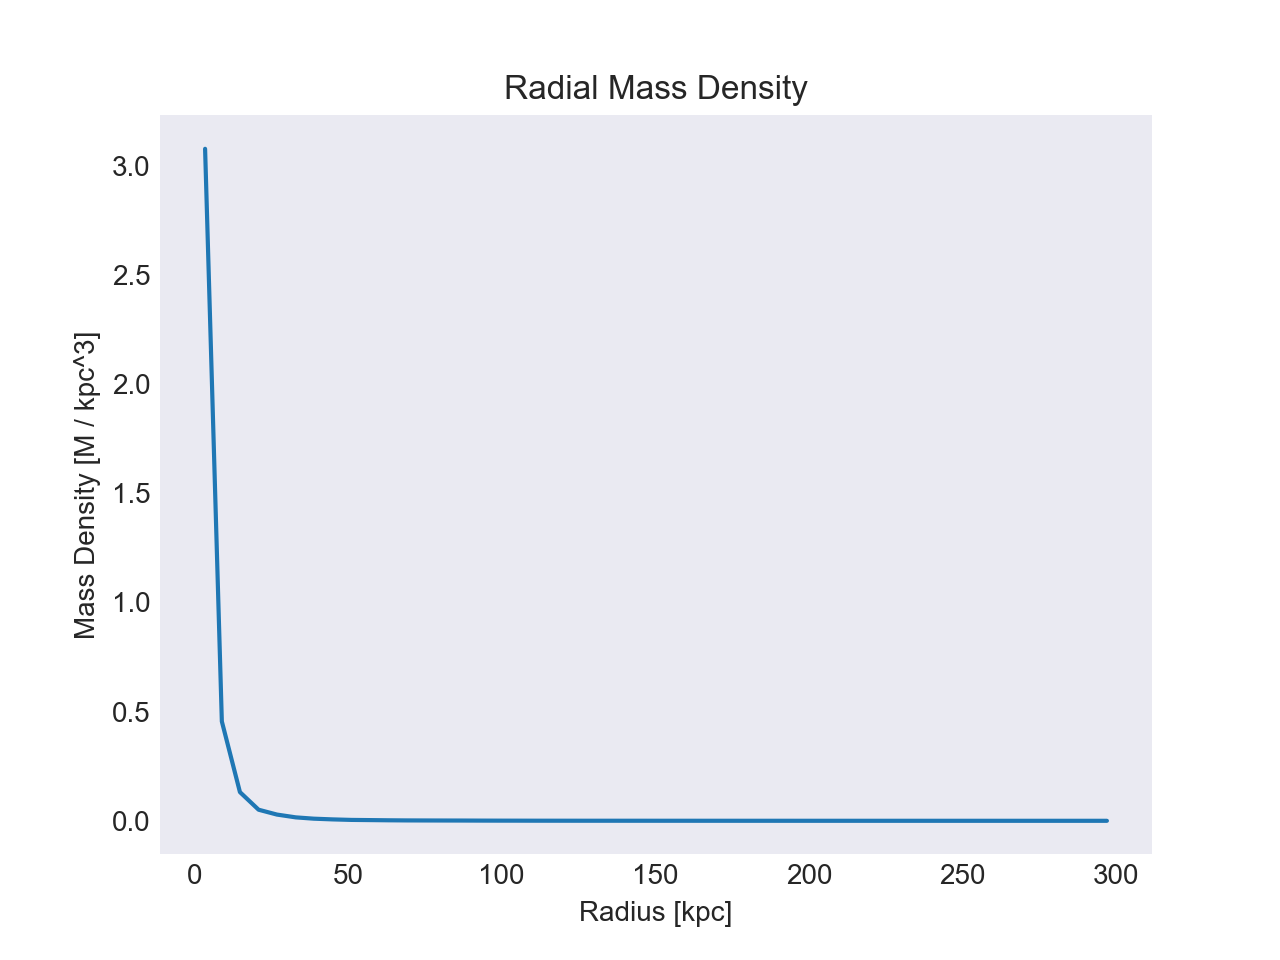

In [50]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(median, radial_mass_density)

ax.set_title("Radial Mass Density")
ax.set_xlabel("Radius [kpc]")
ax.set_ylabel("Mass Density [M / kpc^3]")

plt.show()

A log 10 radius histogram plot:

<IPython.core.display.Javascript object>


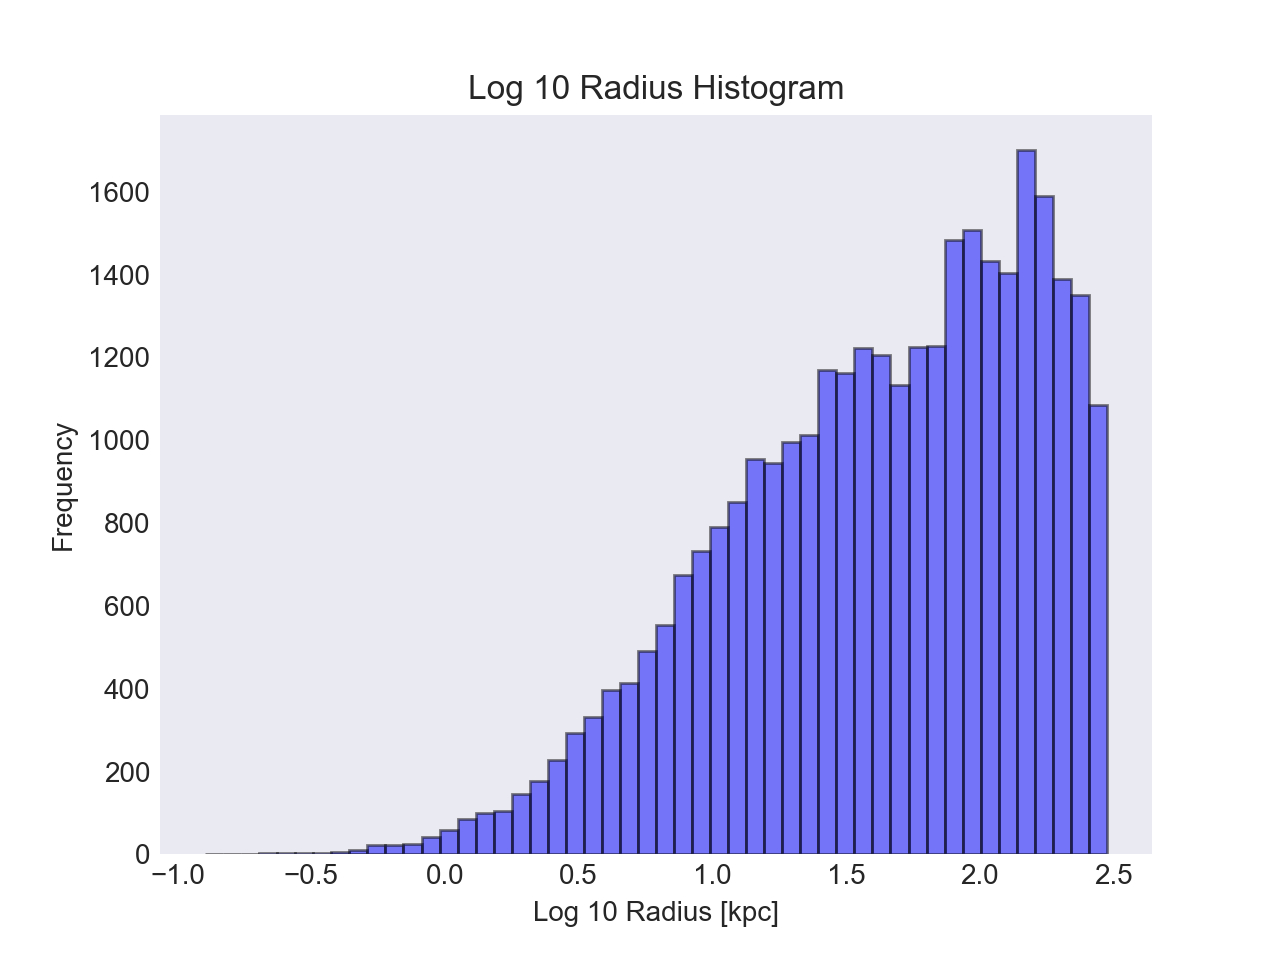

[1.000e+00 2.000e+00 1.000e+00 3.000e+00 3.000e+00 3.000e+00 4.000e+00
 6.000e+00 1.000e+01 2.200e+01 2.300e+01 2.600e+01 4.200e+01 5.900e+01
 8.600e+01 1.000e+02 1.040e+02 1.450e+02 1.780e+02 2.290e+02 2.930e+02
 3.310e+02 3.960e+02 4.150e+02 4.920e+02 5.530e+02 6.740e+02 7.330e+02
 7.910e+02 8.500e+02 9.560e+02 9.460e+02 9.950e+02 1.012e+03 1.169e+03
 1.163e+03 1.222e+03 1.205e+03 1.133e+03 1.226e+03 1.228e+03 1.484e+03
 1.507e+03 1.432e+03 1.404e+03 1.700e+03 1.591e+03 1.390e+03 1.351e+03
 1.084e+03]
[-0.897737342041064, -0.7945182501104431, -0.7030429395063352, -0.686746977352643, -0.5841451106937777, -0.5194844984152494, -0.4654044412861438, -0.40241606194973567, -0.31574268662638805, -0.2635129752501123, -0.18348928121090202, -0.10982547926204381, -0.04618291425046696, 0.016827921984129458, 0.08804555370683803, 0.1446845091001933, 0.21741034119072752, 0.2818532686209949, 0.3532498773549223, 0.4221075582359831, 0.4899137497323748, 0.5545073940832683, 0.6221423807809292, 0.69023370

<IPython.core.display.Javascript object>


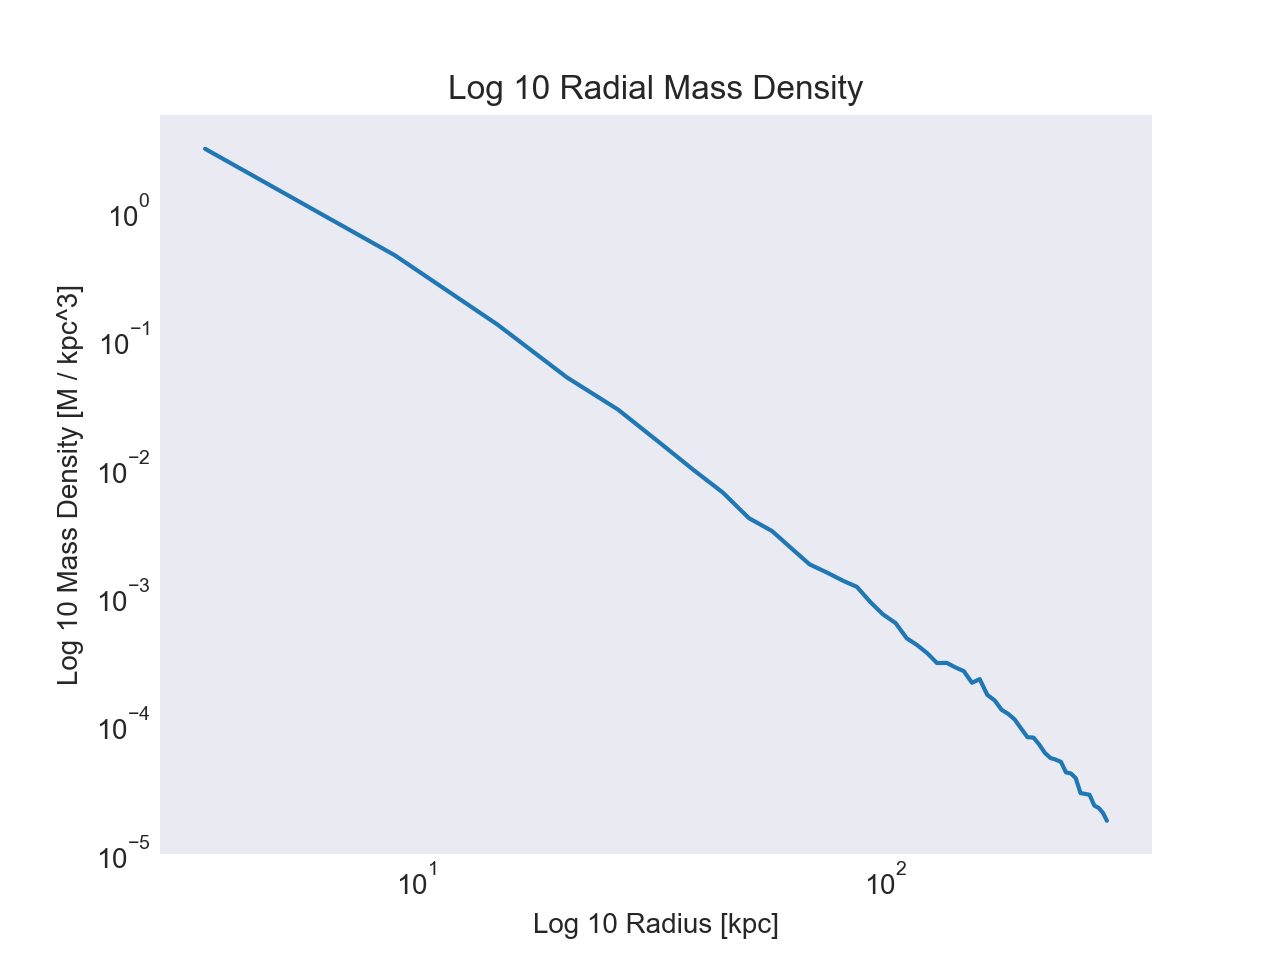

In [51]:
log10_radius = np.log10(radius)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

num_bins = 50
n2, bins, patches = ax.hist(log10_radius, num_bins, facecolor="blue", alpha=0.5, ec="black")
print(n2)

ax.set_title("Log 10 Radius Histogram")
ax.set_xlabel("Log 10 Radius [kpc]")
ax.set_ylabel("Frequency")

plt.show()

num_elements = 0
bin_content = []
log10_median = []

for bin_size in n2:
	bin_content = log10_radius[int(num_elements) : int(num_elements + bin_size)]

	if bin_size == 0:
		log10_median.append(0)

	elif bin_size % 2 == 1:
		log10_median.append(float(bin_content[int(((bin_size + 1) / 2) - 1)]))

	else:
		log10_median.append((bin_content[int((bin_size / 2) - 1)] + bin_content[int(bin_size / 2)]) / 2.0)
	
	num_elements += bin_size

print(log10_median)

log10_radial_mass_density = np.log10(radial_mass_density)
print(log10_radial_mass_density)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# ax.plot(log10_median, log10_radial_mass_density)
ax.loglog(median, radial_mass_density)

ax.set_title("Log 10 Radial Mass Density")
ax.set_xlabel("Log 10 Radius [kpc]")
ax.set_ylabel("Log 10 Mass Density [M / kpc^3]")

plt.show()

A radial mass density 2d plot:

7.0


<IPython.core.display.Javascript object>


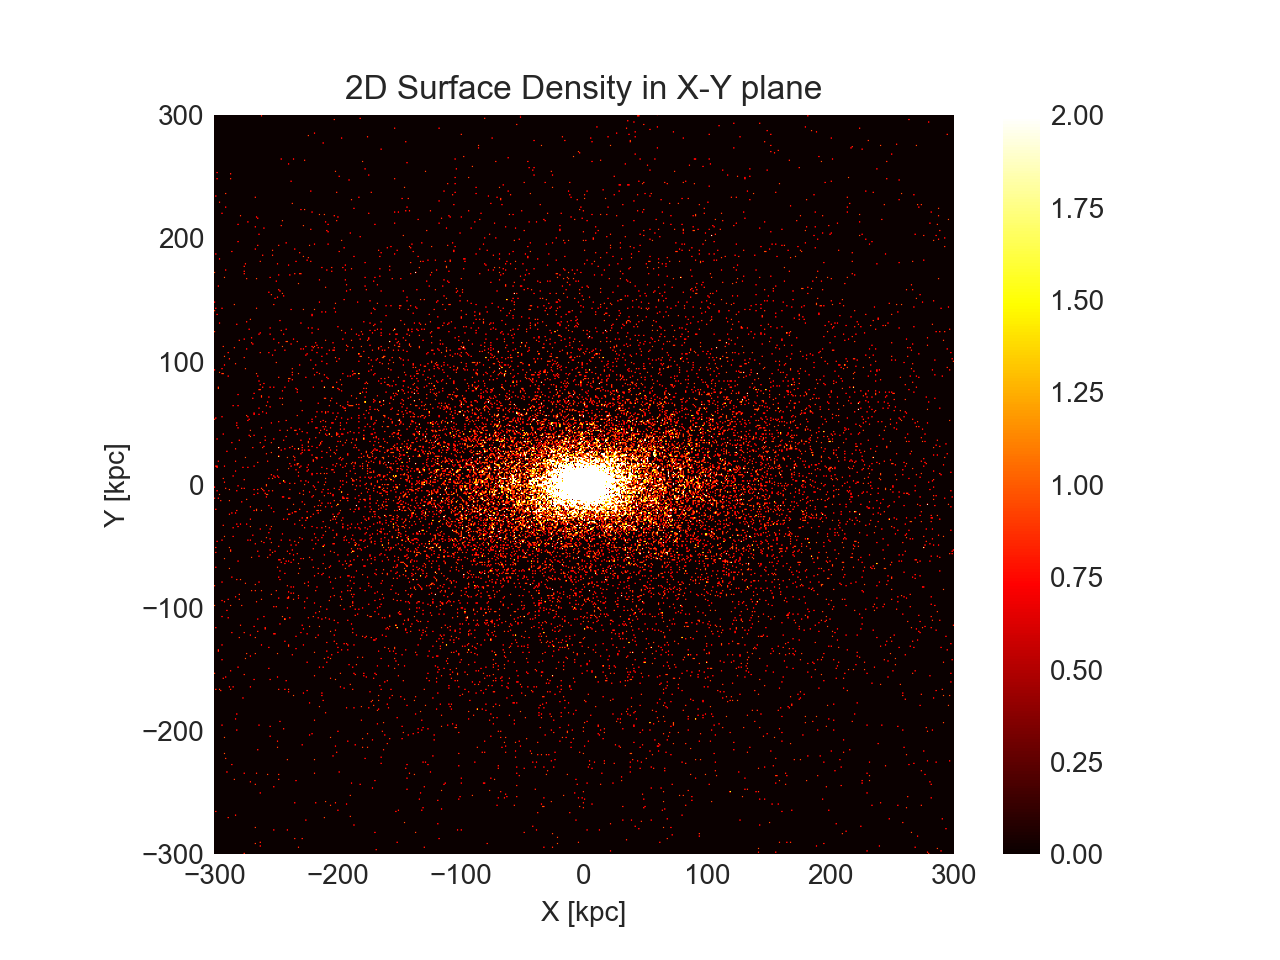

<IPython.core.display.Javascript object>


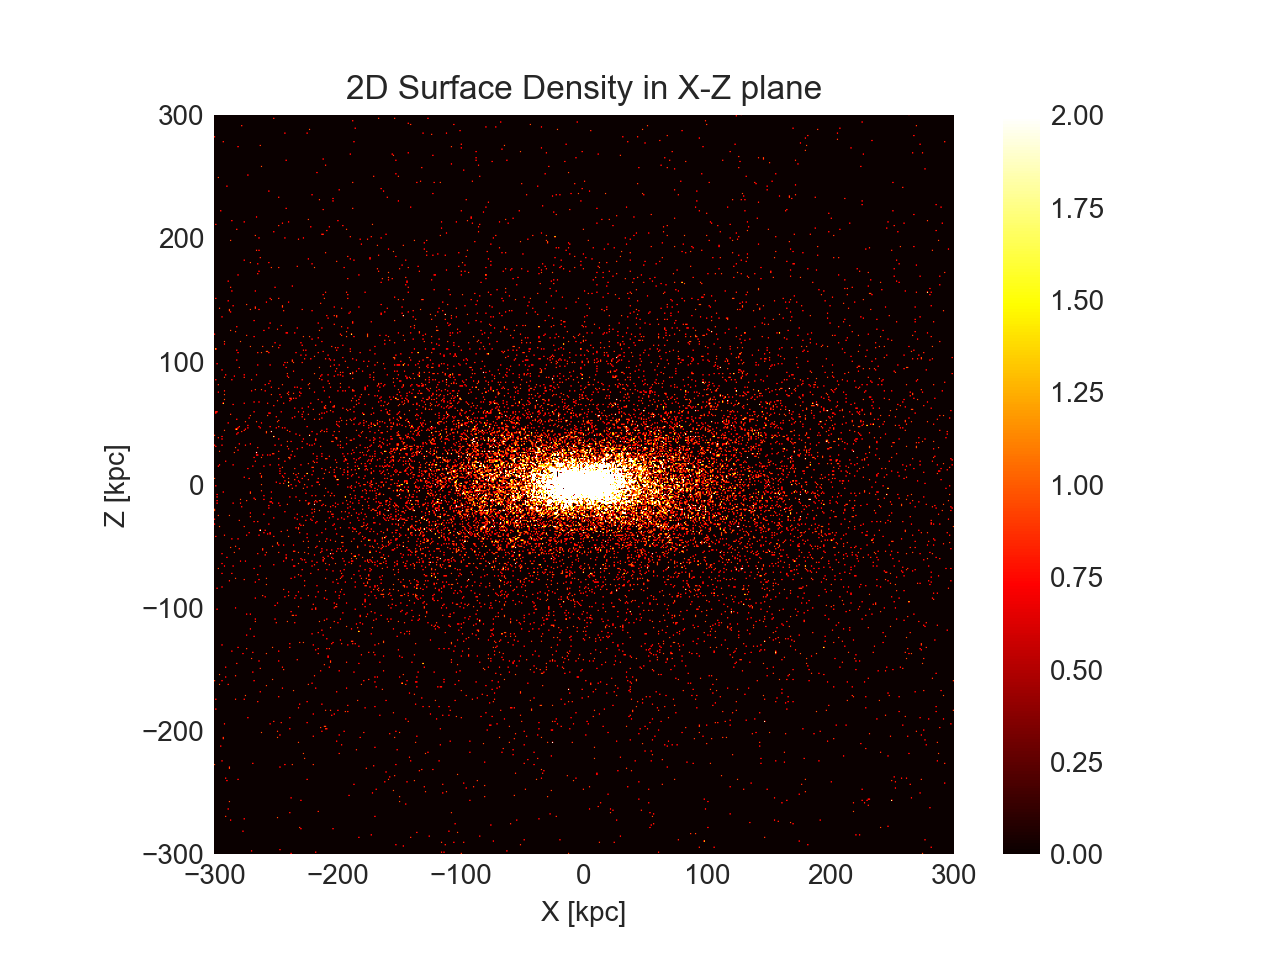

<IPython.core.display.Javascript object>


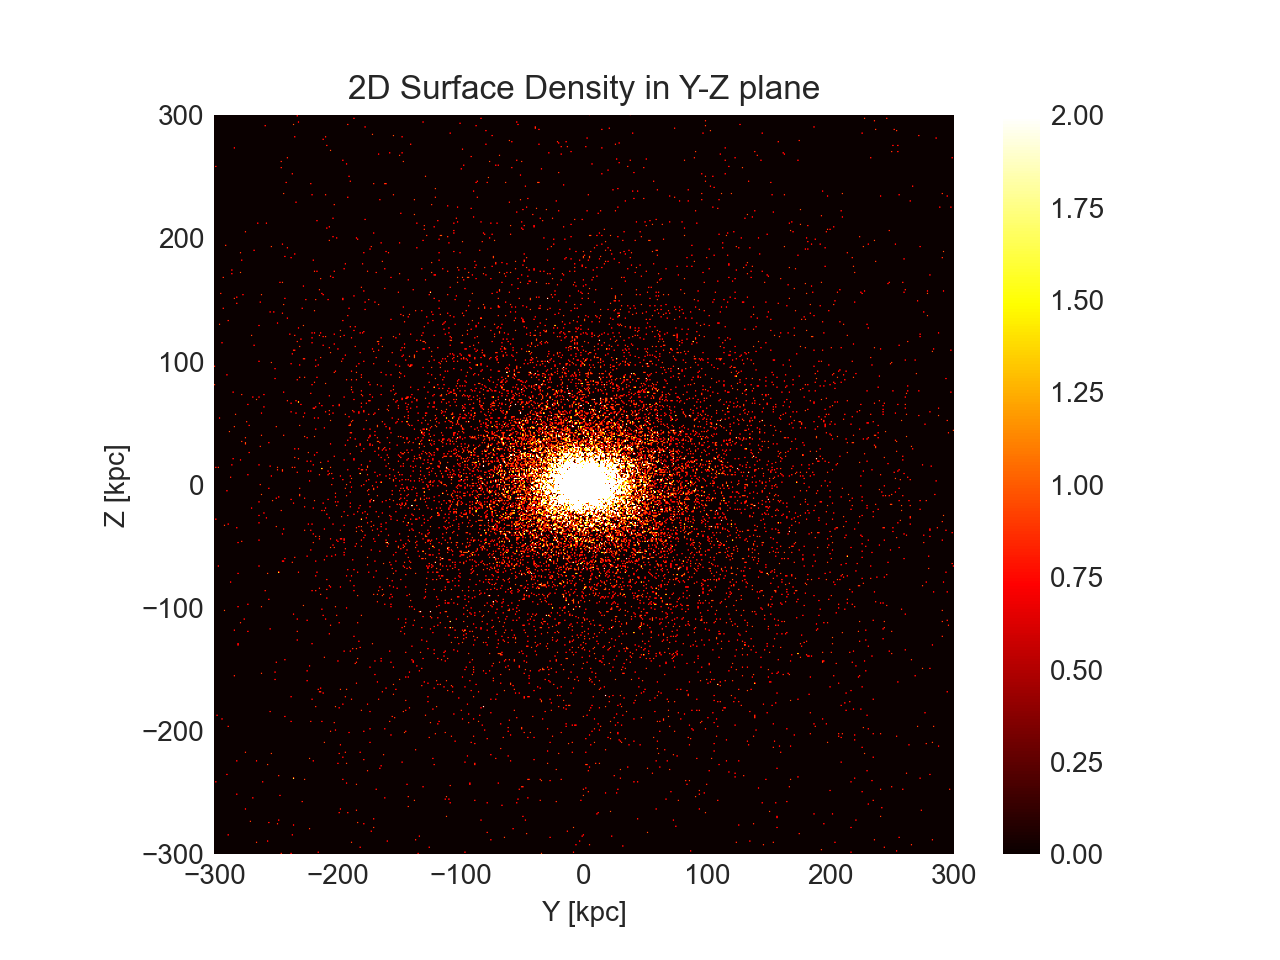

In [52]:
star_coords = list(filter(lambda x: ((-300 <= x[0] <= 300) and (-300 <= x[1] <= 300) and (-300 <= x[2] <= 300)), zip(x, y, z)))
# print(star_coords)

surface_density_xy = np.zeros((600, 600))
surface_density_xz = np.zeros((600, 600))
surface_density_yz = np.zeros((600, 600))

for i in star_coords:
    surface_density_xy[int(np.floor(i[1] + 300))][int(np.floor(i[0] + 300))] += 1
    surface_density_xz[int(np.floor(i[2] + 300))][int(np.floor(i[0] + 300))] += 1
    surface_density_yz[int(np.floor(i[2] + 300))][int(np.floor(i[1] + 300))] += 1
    
print(surface_density_xy[310, 310])
# print(surface_density_xz)
# print(surface_density_yz)

grid_x = range(-300, 300)
grid_y = range(-300, 300)
X, Y = np.meshgrid(grid_x, grid_y)

Z1 = surface_density_xy
Z2 = surface_density_xz
Z3 = surface_density_yz

fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.set_title("2D Surface Density in X-Y plane")
ax.set_xlabel("X [kpc]")
ax.set_ylabel("Y [kpc]")
img1 = ax.imshow(Z1, extent=(-300, 300, -300, 300), cmap=cm.hot, vmin=0, vmax=2)
fig1.colorbar(img1)
plt.show()

fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.set_title("2D Surface Density in X-Z plane")
ax.set_xlabel("X [kpc]")
ax.set_ylabel("Z [kpc]")
img2 = ax.imshow(Z2, extent=(-300, 300, -300, 300), cmap=cm.hot, vmin=0, vmax=2)
fig2.colorbar(img2)
plt.show()

fig3 = plt.figure()
ax = fig3.add_subplot(111)
ax.set_title("2D Surface Density in Y-Z plane")
ax.set_xlabel("Y [kpc]")
ax.set_ylabel("Z [kpc]")
img3 = ax.imshow(Z3, extent=(-300, 300, -300, 300), cmap=cm.hot, vmin=0, vmax=2)
fig3.colorbar(img3)
plt.show()

3D velocity and its relationship to radius:

[372.03709029 324.16773951 402.53865348 ... 309.49799847 455.02400573
  63.28958936] 31773


<IPython.core.display.Javascript object>


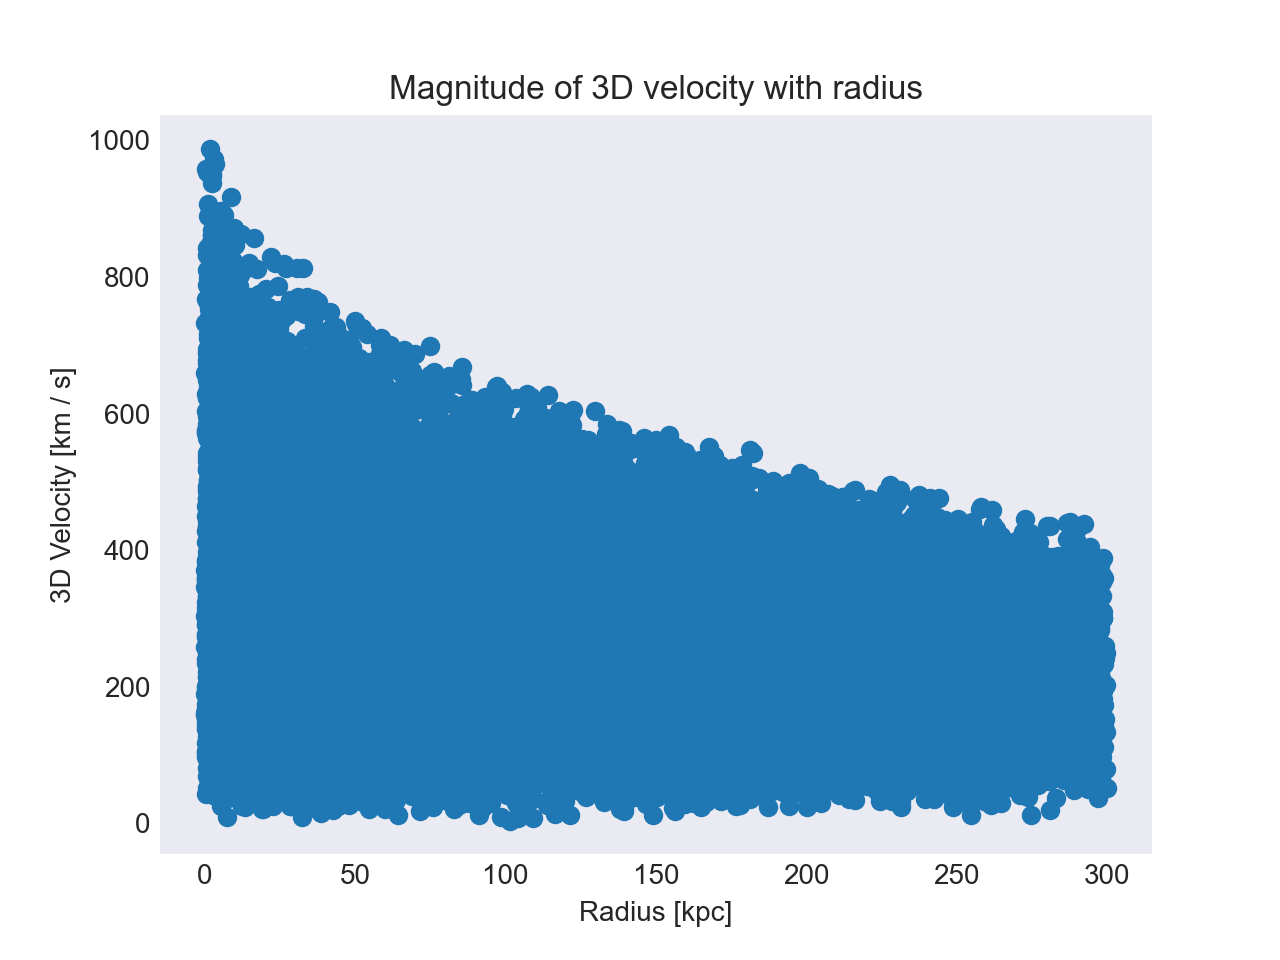

In [53]:
v_3d = np.array([np.sqrt(vx[i] ** 2 + vy[i] ** 2 + vz[i] ** 2) for i in range(39656) if np.sqrt(x[i]**2 + y[i]**2 + z[i]**2) <= 300])
print(v_3d, len(v_3d))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(unsorted_radius, v_3d)
ax.set_title("Magnitude of 3D velocity with radius")
ax.set_xlabel("Radius [kpc]")
ax.set_ylabel("3D Velocity [km / s]")

plt.show()

Plotting escape velocity with radius and approximating mass per particle:

<IPython.core.display.Javascript object>


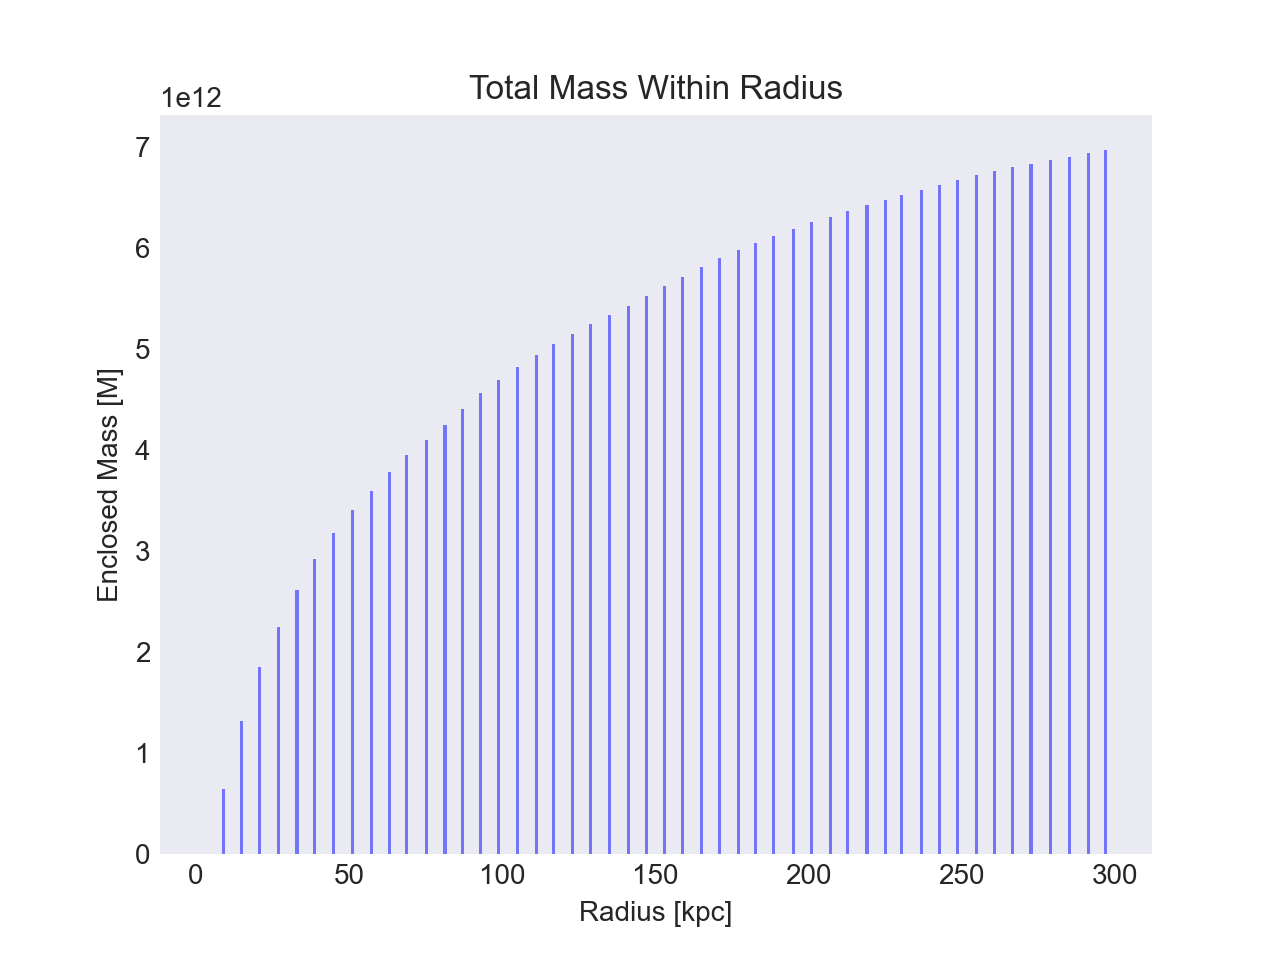

<IPython.core.display.Javascript object>


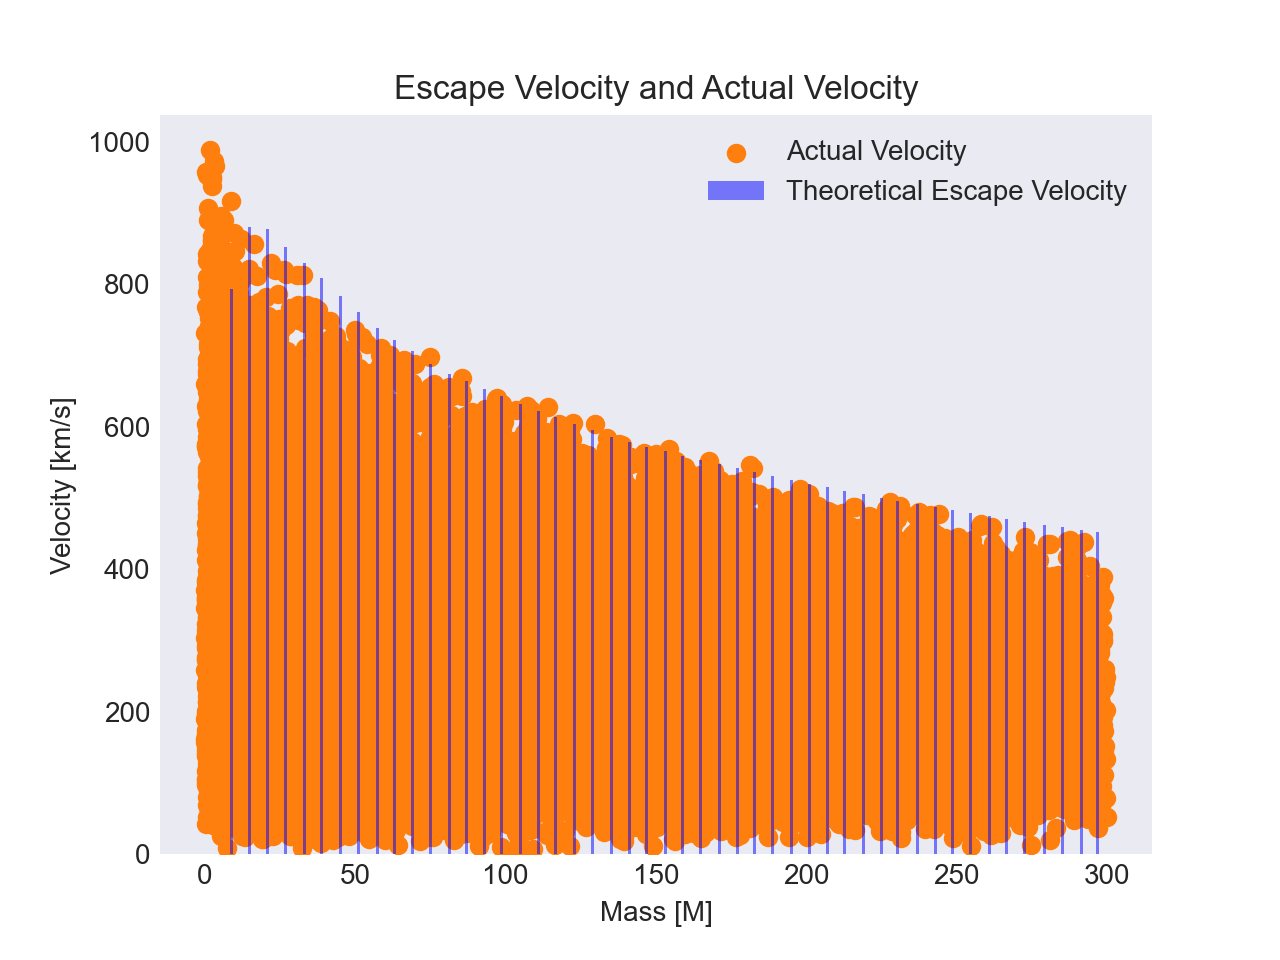

Approximate mass per particle: 220000000.00000003
Total mass of galaxy: 6962340000000.001


In [60]:
stellar_mass = 2.2 * (10 ** 8)
G = 4.35 * 10 ** (-6)

enclosed_mass = [stellar_mass * sum(n1[:i]) for i, n in enumerate(n1)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(median, enclosed_mass, facecolor="blue", alpha=0.5, width=1)

ax.set_title("Total Mass Within Radius")
ax.set_xlabel("Radius [kpc]")
ax.set_ylabel("Enclosed Mass [M]")

plt.show()

escape_velocity = [np.sqrt(2 * G * value / median[index]) for index, value in enumerate(enclosed_mass)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(median, escape_velocity, facecolor="blue", alpha=0.5, width=1)
ax.scatter(unsorted_radius, v_3d)

ax.set_title("Escape Velocity and Actual Velocity")
ax.set_xlabel("Mass [M]")
ax.set_ylabel("Velocity [km/s]")
ax.legend(["Actual Velocity", "Theoretical Escape Velocity"])

plt.show()

print("Approximate mass per particle:", stellar_mass)
print("Total mass of galaxy:", enclosed_mass[-1])
